## 활성화 함수

### sigmoid 함수

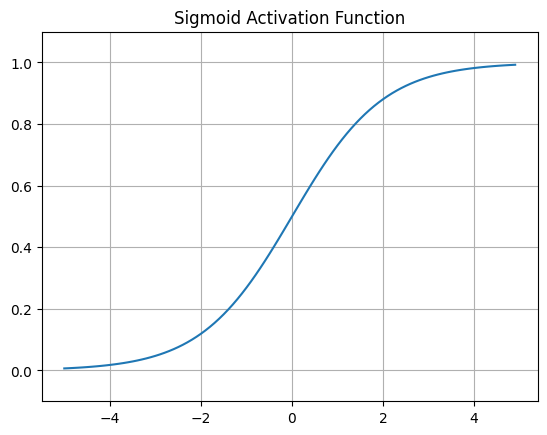

In [18]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

# 그래프 그려보기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Activation Function")
plt.grid()
plt.show()

### Tanh 함수

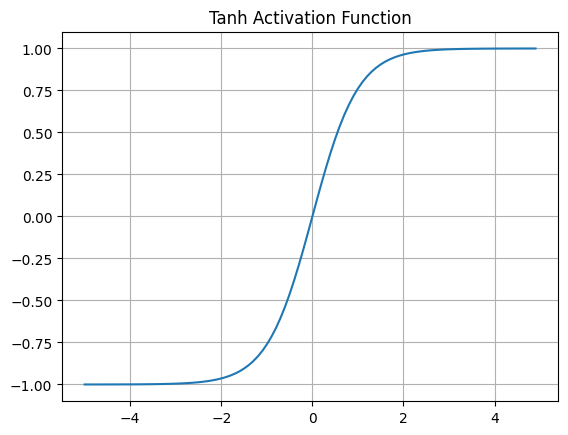

In [15]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
    return np.tanh(x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)  # y축 범위 설정
plt.title("Tanh Activation Function")
plt.grid()
plt.show()

### ReLU 함수

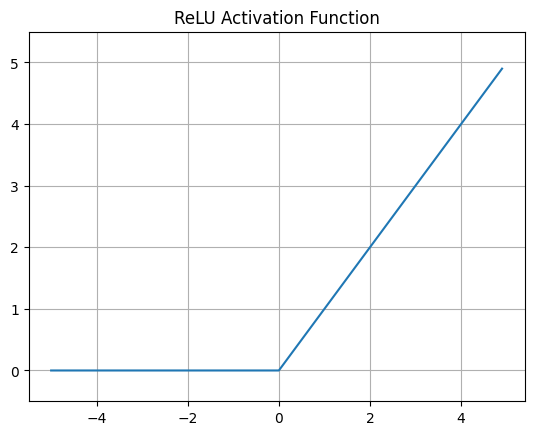

In [16]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)  # y축 범위 설정
plt.title("ReLU Activation Function")
plt.grid()
plt.show()

## 텐서플로우(tensorflow)

### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [22]:
### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제 ###
import tensorflow as tf
import numpy as np
import pandas as pd

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [23]:
# 1. 데이터 준비
# x_data: 입력 데이터, y_data: 실제 값 (정답)
x_data = np.array([0, 1, 2, 3, 4], dtype=np.float32)
y_data = np.array([1, 3, 5, 7, 9], dtype=np.float32)

In [24]:
# 2. 모델 정의
# 가중치(w)와 편향(b)를 변수로 정의
w = tf.Variable(0.0)  # 초기 가중치
b = tf.Variable(0.0)  # 초기 편향

In [25]:
# 예측 함수 (y = wx + b)
def predict(x):
    return w * x + b

In [26]:
# 3. 손실 함수 정의
# 평균 제곱 오차 (Mean Squared Error, MSE) 사용
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [28]:
# 4. 최적화 알고리즘 선택
optimizer = tf.optimizers.SGD(learning_rate=0.01)  # 확률적 경사 하강법

In [29]:
# 5. 학습 과정
for step in range(100):  # 100번 반복
    with tf.GradientTape() as tape:
        y_pred = predict(x_data)  # 예측값
        loss = loss_fn(y_data, y_pred)  # 손실 계산

    # 가중치와 편향에 대한 경사도 계산 및 업데이트
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if step % 10 == 0:  # 10번마다 로그 출력
        print(f"Step {step}, Loss: {loss.numpy()}, w: {w.numpy()}, b: {b.numpy()}")

Step 0, Loss: 33.0, w: 0.2800000011920929, b: 0.09999999403953552
Step 10, Loss: 1.8755830526351929, w: 1.6574040651321411, b: 0.6004058718681335
Step 20, Loss: 0.1229294165968895, w: 1.9802603721618652, b: 0.7298945188522339
Step 30, Loss: 0.02239181473851204, w: 2.053251266479492, b: 0.7707916498184204
Step 40, Loss: 0.014991003088653088, w: 2.0671944618225098, b: 0.7900874018669128
Step 50, Loss: 0.013025246560573578, w: 2.0673303604125977, b: 0.8037028312683105
Step 60, Loss: 0.011540031060576439, w: 2.06437611579895, b: 0.8154456615447998
Step 70, Loss: 0.010236968286335468, w: 2.0608623027801514, b: 0.8262498378753662
Step 80, Loss: 0.009081726893782616, w: 2.0573794841766357, b: 0.8363654017448425
Step 90, Loss: 0.00805690512061119, w: 2.0540578365325928, b: 0.8458786010742188


In [30]:
# 6. 예측 및 결과 확인
print("Final Parameters:", f"w={w.numpy()}, b={b.numpy()}")
print("Prediction for x=5:", predict(5).numpy())

Final Parameters: w=2.051225423812866, b=0.8539638519287109
Prediction for x=5: 11.110091


### keras를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
# 1. 데이터 준비
# 입력(x)과 출력(y) 데이터를 정의합니다.
x_data = np.array([0, 1, 2, 3, 4], dtype=np.float32)  # 입력 데이터
y_data = np.array([1, 3, 5, 7, 9], dtype=np.float32)  # 정답 데이터

In [34]:
# 2. 모델 정의
# Sequential API를 사용해 신경망을 정의합니다.
model = Sequential([
    Dense(1, input_dim=1)  # 입력 1개, 출력 1개 (선형 회귀)
])

c:\AiProject\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# 3. 모델 컴파일
# 손실 함수와 옵티마이저를 설정합니다.
model.compile(optimizer='sgd', loss='mse')

In [38]:
# 4. 모델 학습
# fit() 메서드로 데이터를 학습시킵니다.
model.fit(x_data, y_data, epochs=100, verbose=1)  # 50번 반복 학습

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0025
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0025
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0025
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0024
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0024
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0023
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0023
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0023
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0022
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0022
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0022
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0022
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0021
Epoch 16/100
1/1

In [39]:
# 5. 예측 및 평가
# 새로운 데이터로 예측 수행
x_new = np.array([5], dtype=np.float32)
y_new = model.predict(x_new)

print(f"x = 5일 때, 예측된 y = {y_new[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
x = 5일 때, 예측된 y = 11.04


### MINIST 예제 (CNN모델 예제)

In [41]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf  # 딥러닝 라이브러리
from tensorflow.keras import layers, models  # 신경망 계층 및 모델 설계
from tensorflow.keras.datasets import mnist  # MNIST 데이터셋
import matplotlib.pyplot as plt  # 시각화 도구

In [42]:
# 2. 데이터 로드 및 전처리
# MNIST 데이터셋은 이미 나뉘어 제공 (학습/테스트 데이터)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [43]:
# MNIST 이미지는 28x28 크기, 채널 정보 추가 (흑백 이미지는 채널 1개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0  # 0~1로 정규화
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [44]:
# 레이블을 One-Hot Encoding (숫자 0~9를 벡터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1:  # shape이 (n,)인지 확인
    y_train = tf.keras.utils.to_categorical(y_train, 10)
if len(y_test.shape) == 1:  # shape이 (n,)인지 확인
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [45]:
# 3. CNN 모델 정의
model = models.Sequential()  # 순차적 모델 선언

In [46]:
# 첫 번째 합성곱 계층: 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 풀링 계층: 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2, 2)))

c:\AiProject\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [48]:
# 세 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [49]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

In [50]:
# Fully Connected Layer 1: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

In [51]:
# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

In [52]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# 4. 모델 컴파일
model.compile(optimizer='adam',               # 최적화 알고리즘
              loss='categorical_crossentropy', # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])           # 평가 지표: 정확도

In [54]:
# 5. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8481 - loss: 0.5027 - val_accuracy: 0.9763 - val_loss: 0.0765
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9799 - loss: 0.0637 - val_accuracy: 0.9833 - val_loss: 0.0585
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9853 - val_loss: 0.0478
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9862 - val_loss: 0.0461
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9888 - val_loss: 0.0396


In [55]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0336
테스트 정확도: 0.9908


In [56]:
# 7. 결과 확인: 테스트 데이터에서 임의의 이미지 예측
import numpy as np

In [57]:
# 테스트 데이터에서 첫 번째 샘플을 가져옴
sample_image = x_test[0]   # 첫번 째 이미지 저장
sample_label = np.argmax(y_test[0])   # y_test[0] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장합니다.

In [58]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


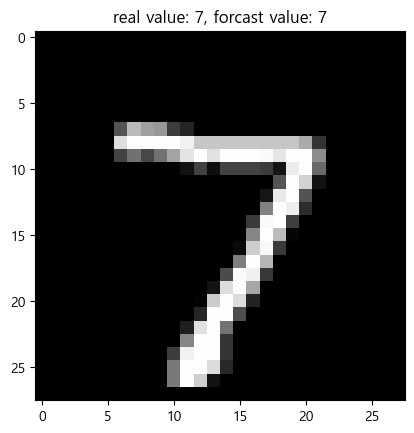

In [59]:
# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()